# Topic Modeling
This section will be on two popular approaches for topic modeling:

#### 1) Latent Dirichlet Allocation (LDA)
- Bayesian model (full bayesian model)
- the most complex model in this course
#### 2) Non-negative Matrix Factorization (NMF)
- originates from the recommender systems

### why topic modeling is useful?
- no labels required / used
- almost like a powerful version of clustering
- clustering : assigns categories to documents withotu needing labels (automatic doc organization)
- while clusters are discrete objects, topics can be much more richly expressed
- another application: document retrieval in research engines
- simplest way: convert your docs to Tfidf vector and use the nearest neighbor search to find closest document
- but this can be problemaitc as Tfidf vectors can be too sparse
- Topic modeling is a method of reducing a document into small set of topics so it can be eaiserly and more accurately searched

## Latent Dirichlet Allocation
LDA is also an acronym for another ML model: Linear Discriminat Analysis, don't confuse
### The paper: Latent Dirichlet Allocation - David Blei, Andrew Ng, Michael Jordan
- if you wanna read, it's very advanced, but in extra_reading box in github
- paper is also a beautiful demonstrtion of some advanced techniques in ML:
    - Probabilistic Graphical Models (PGM)
    - Expectation-Maximisation(EM)
    - Variational Inference(VI)
all these are important models in Bayesian Machine Learning
- also the paper begins by building off Latent Semantic Indexing, deste bahsetcex bundan

#### In unsupervise learning, we assign the clusters meaning based on our own interpretation but these clusters have no meaning by themselves
- another issue is choosing the number of clusters

### API perspective: what are the inputs? what are the outputs?
- Inputs: count vectors (bag of words) #so we don't take the order of the words into account
- use sklearn.feature_extraction.text.CountVectorizer
- Output: Two matrices : topics x words and documents x topics
- so how can we interpret what this means?
#### The first output: topics x words
- FOR LDA, EACH TOPIC IS A DISTRIBUTION OVER WORDS, NOT A DISCRETE CATEGORY
- one way to visualize the topics is simply show the distribution on a bar chart of the top words for each topic
#### The second output: documents x topics 
- again we can visualize each document in a barchart, displaying the amount each topic belongs to that document
- That is how this is like soft clustering since we don't assign a document to just one topic
- A cdocument can contain more than one topic that's why probabilistic topic assignment is useful

### The Actual API

Note: Z is a common letter in ML, to denote Z = data we did not observe while X = observed data.

- If you study ML further, see this can be referred also "latent variables" or "hidden variables"
- another diff with supervised learning is that you use transform method instead of predict, which makes a lot of sense, you don't have any targets to predict, you'ere just transforming input into a new variable, latent variable
- Both transform and predict can be generalized under what we call "inference"
- What happened to the other matrix: topics x words?
- it's stored in atrribute topics = lda.components_
- this makes sense bcz the model can be used to transform any document, even one that didn't exist in the training set
- so suppose you already builyt yoır model and your boss comes with new documents x_Test
- you don't need to retrain the model as that'll take a lot of work.
simply: z_test = lda.transform( x_test)
- this unlike the components matrix which is more a property of model rather than a data to be transformed
- they're part of the model, not part of the doc you're transforming
#### Topics are distributions over words, documents are distributions over topics. In LDA documents are mixture of topics and topics are mixture of words


### LDA - Advanced Intuition
- it has many prerequisites
- just as in Bayes we try to find p(y|x) from p(x|y)*p(y) / p(x) here we try to obtain p(z|x) from p(x|z)* p(z) / p(x)
- the only problem, z is unobserved, so how? By what's called Expectation Maximisation
- Graphical models tell a story on the assumptions about how our model is created: Both bayes classifier and unsupervised clustering follows the same data generating process which is:
- y --> x ve z --> x. since thre is no arrow towards y, it means these values are generated from thin air using p(y), i.e. 20% spam and 80% not spam, using this distribution we can sample a realization of y. then we can follow the arrow to x, suppose p(x|y) is multinomial as we've seen, then we simply draw samples from this multinomial distribution, which gives us let's say 5 instances of "car", 3 instances of "insurance", 6 instances of "cat" so on... since this multinomial is dependent on why, there will be different distributions whether y is spam or not spam
- so this will result in our x vector, which contains various counts for the words in our corpus
- notice :  this is unrealistic process: nobody generates an email by thinking how many times each word will be used, but fine

- the same steps applies to z, z comes out of thin air, given z we folow to x which tells us how many times we should expect to see each word depending on p(x|z) distribution
- just in addition to guess what z mean, we'll also have to guess how many they are in the first place
- Plate Notation: N- consider this as a for loop, N says how many times the loop runs
- it means:

#### başka bi videodan öğrendiklerim:

LDA assumes a new document generated in the following way: 
- Determine number of words in the document
- choose the topic mixture for document over a fixed set of topics
- Generate the words in the document by:
    - first pick a topic based on the multinomial distribution above
    - next pick a word based on topic's multinomial distribution
ex: we have 3 topics animals, cooking, politics and we have many words under each topic
we wanna generating a document that is 20% about politics 80% animals
- we choose the length of article
- we choose a topic based on our specified mixture (rougly 800 words on animals and 200 words on politics)
- we choose a word based on the word distribution for each topic
#### this is the demostration of what LDA model assumes to be true

LDA backtracks from the document level to identify the topics that are likely to have generated the corpus

https://www.youtube.com/watch?v=DWJYZq_fQ2A baya iyi anlatmış

#### LDA samples a different topic for every word

- When a parameter is prior to other parameters, we call it hyperparameter
- for some distributions, priors called to conjugate priors and they make it easier to aply bayesian rule to get posteror
- since our topics of z are discrete, they come from a multinomial distribution, for multiinomial, the conjugate prior is Dirichlet

IPAD'e videodan plate notation'ı çizdim

## Exercise Prompt:
- we'll use BBC data but since it's unsupervised we won't use labels

In [1]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File 'bbc_text_cls.csv' already there; not retrieving.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer #bcz model itself is based on word counts not frequencies
from sklearn.decomposition import LatentDirichletAllocation

#decomposition module is also home for models like PCA, SVD and MF facotr analysis

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yagmuraslan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
stops = set(stopwords.words('english'))
stops = stops.union({
    'said', 'would', 'could', 'told', 'also', 'one', 'two',
    'mr', 'new', 'year', 
})
stops = list(stops) # required for later version of CountVectorizer

#he normally ran th,s model without the stopwords but then saw them appear inside the topics, that's why
# if you see generic words in your output, it's likely that they're not useful, so yu can go back and simply remove them

In [5]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
vectorizer = CountVectorizer(stop_words=stops)
X = vectorizer.fit_transform(df['text'])

# Note: you could potentially split the data into train and test
# and evaluate the model 
# for LDA the common metrics are the log-likelihood or perplexity(exponential of negative log-likelihood)
# on out-of-sample data

In [7]:
lda = LatentDirichletAllocation(
    n_components=10, # default: 10 it can be optimized (sanırım bu number of topics ???)
    random_state=12345,
)

lda.fit(X)

LatentDirichletAllocation(random_state=12345)

In [10]:
def plot_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
            top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
            top_features = [feature_names[i] for i in top_features_ind]
            weights = topic[top_features_ind]

            ax = axes[topic_idx]
            ax.barh(top_features, weights, height=0.7)
            ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
            ax.invert_yaxis()
            ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
            ax.spines[i].set_visible(False)
            fig.suptitle('LDA', fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
    
    #detayları çok önemli değilmiş, naptığı önemli

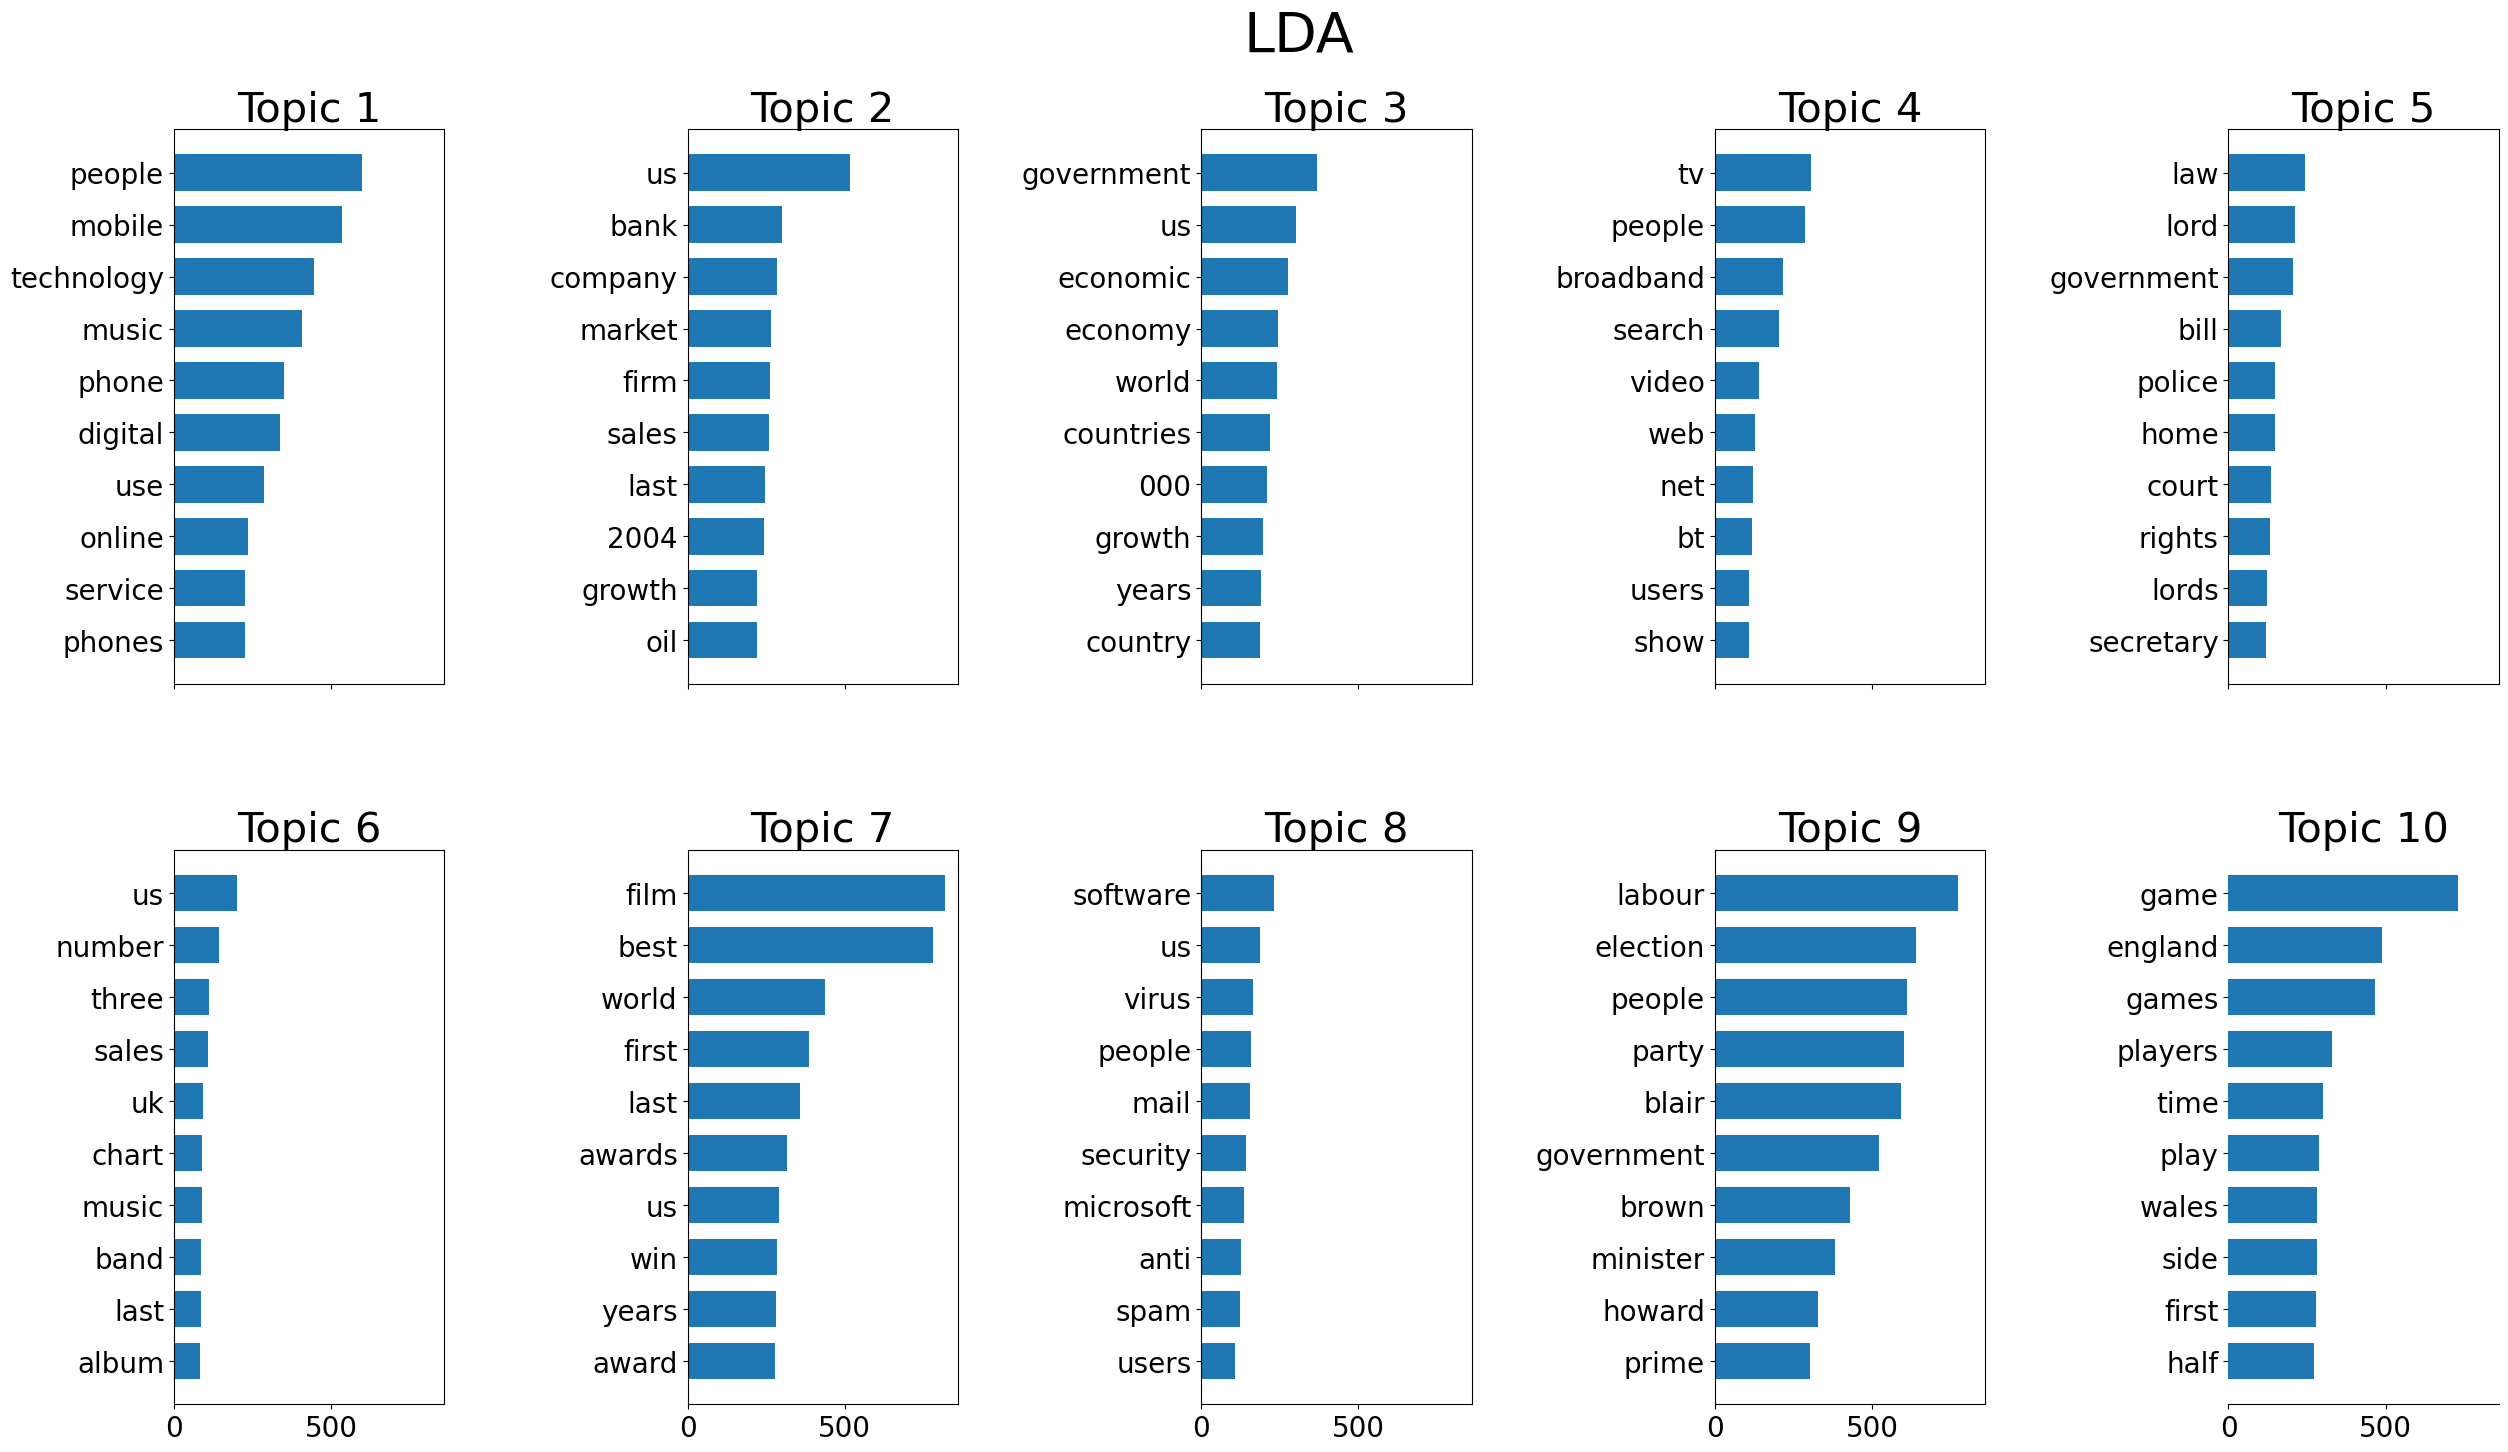

In [11]:
feature_names = vectorizer.get_feature_names_out() #it's the reverse of word2idx ; an idx2word mapping
#it's stored in count vectorizer object
plot_top_words(lda, feature_names);

#see the same word can be associated to multiple topics

In [12]:
#let's see the second matrix: documents x topic
Z = lda.transform(X)

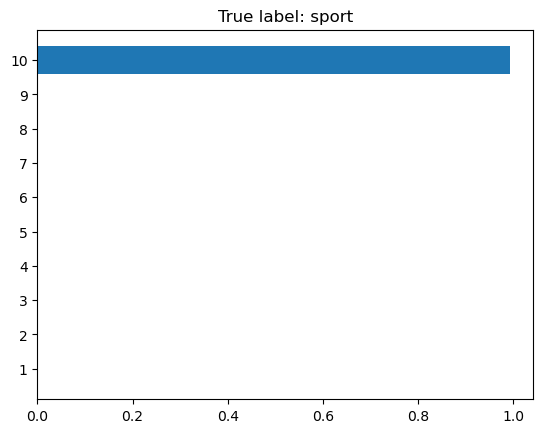

In [13]:
# Pick a random document
# Check which "topics" are associated with it
# Are they related to the true label? BBC'nin kendi atadığı

np.random.seed(0)
i = np.random.choice(len(df))
z = Z[i] #gives us a 1d array which represents distribution over topics
topics = np.arange(10) + 1 #sayıları 0'dan 9'a sırayalyup hepsine bir ekler, liste

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels']);

In [14]:
#print the text

def wrap(x):
    return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i]['text']))

Charvis set to lose fitness bid

Flanker Colin Charvis is unlikely to
play any part in Wales' final two games of the Six Nations.

Charvis
has missed all three of Wales' victories with an ankle injury and his
recovery has been slower than expected.  "He will not figure in the
Scotland game and is now thought unlikely to be ready for the final
game," said Wales physio Mark Davies.  Sonny Parker is continuing to
struggle with a neck injury, but Hal Luscombe should be fit for the
Murrayfield trip.  Centre Parker has only a "slim chance" of being
involved against the Scots on 13 March, so Luscombe's return to
fitness after missing the France match with hamstring trouble is a
timely boost.

Said Wales assistant coach Scott Johnson: "We're
positive about Hal and hope he'll be raring to go.  "He comes back
into the mix again, adds to the depth and gives us other options.  "
Replacement hooker Robin McBryde remains a doubt after picking up knee
ligament damage in Paris last Saturday.  "We're g

Text(0.5, 1.0, 'True label: entertainment')

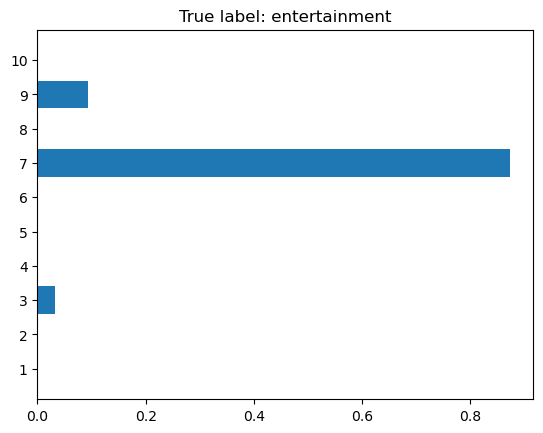

In [15]:
i = np.random.choice(len(df))
z = Z[i]

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels'])

In [16]:
print(wrap(df.iloc[i]['text']))

Oscars steer clear of controversy

The Oscars nominations list has
left out some of the most controversial films of the past year in
favour of safer, less contentious cinema.

If best film nominees were
drawn on the basis of column inches, two of the front-runners would
have had to be Michael Moore's Bush-baiting documentary Fahrenheit
9/11 and Mel Gibson's The Passion of the Christ.  Both films polarised
opinion but had critics talking, and the public turning up to see them
- Fahrenheit 9/11 breaking US box office records for a documentary,
and The Passion of the Christ making more than US$370m (£196m) in the
US alone.  But this year's Academy Awards have shied away from the big
name controversies, with The Passion of the Christ - a film accused of
being anti-Semitic - receiving nominations only in the 'minor'
categories of cinematography, makeup and musical score.

Fahrenheit
9/11 has also been overlooked, despite winning the Palme d'Or at the
Cannes International Film Festival in 20